###Dataset Loading

###Introduction

This project focuses on building a deep learning model to classify images from the CIFAR-10 dataset, which contains 60,000 color images of size 32×32 pixels across 10 classes such as airplanes, cars, birds, cats, trucks, and ships. The goal is to preprocess the dataset, normalize the images, and one-hot encode the labels, then build a dense neural network with 3–4 hidden layers, including Batch Normalization and Dropout to improve training and reduce overfitting. The model is trained using the Adam optimizer and categorical crossentropy loss, and its performance is evaluated on the test set. Additionally, training and validation accuracy and loss are visualized, and some sample predictions are displayed to show how well the model classifies images. This project provides a practical understanding of the deep learning workflow from data preprocessing to model evaluation.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

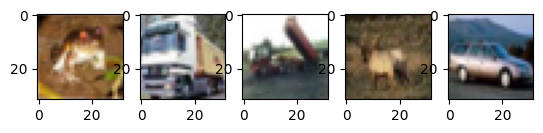

In [ ]:
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(x_train[i])
  plt.show


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[0]

array([6], dtype=uint8)

###Preprocessing

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0


In [ ]:
x_train=x_train.reshape(-1, 32*32*3)
x_test=x_test.reshape(-1, 32*32*3)

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
# One-hot encode
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


###Model Architecture

In [ ]:


model = models.Sequential([
    layers.Input(shape=(32*32*3,)),
 #hidden layer1

    layers.Dense(128),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.3),

#hidden layer2

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.3),

#hidden layer3

    layers.Dense(32),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),

#hidden layer4

    layers.Dense(16),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),

    layers.Dense(10, activation='softmax')
])


###Training

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 405,338 (1.55 MB)

 Trainable params: 404,858 (1.54 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.2641 - loss: 2.0415 - val_accuracy: 0.3142 - val_loss: 1.8697
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3654 - loss: 1.7638 - val_accuracy: 0.4219 - val_loss: 1.6266
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3983 - loss: 1.6819 - val_accuracy: 0.4073 - val_loss: 1.6490
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4100 - loss: 1.6443 - val_accuracy: 0.4448 - val_loss: 1.5559
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4245 - loss: 1.6019 - val_accuracy: 0.4361 - val_loss: 1.5720
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4360 - loss: 1.5801 - val_accuracy: 0.4231 - val_loss: 1.5895
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4522 - loss: 1.5432 - val_accuracy: 0.4469 - val_loss: 1.5308
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4539 - lo

###Visualization

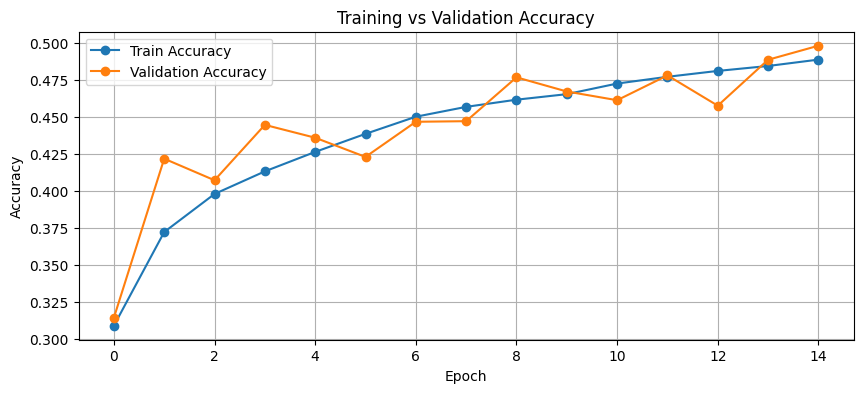

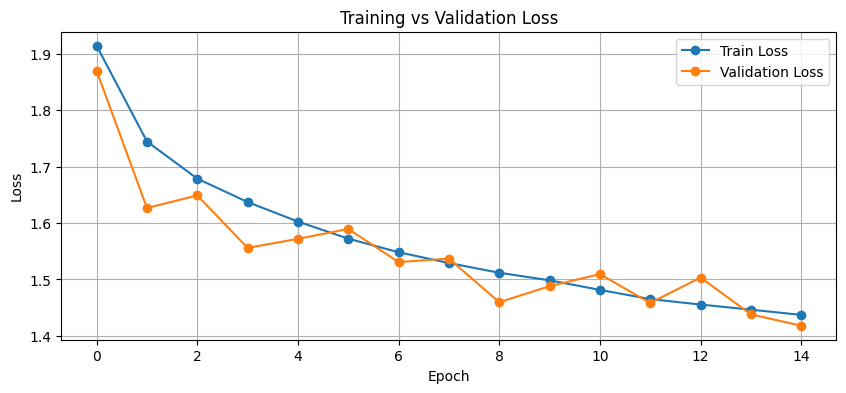

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Loss Plot
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


###Evaluation

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5060 - loss: 1.4106
Test accuracy: 0.4984000027179718


The model achieved a test accuracy of about 49%, which means it correctly classified around half of the test images. This shows that the model learned some patterns, but its performance is limited.